In [1]:
import numpy as np
import datajoint as dj
import os
import sys
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2


base = !pwd
base = os.path.dirname(os.path.dirname(base[0]))
p = os.path.join(base, 'neural-straight/nstraight/')
if p not in sys.path:
    sys.path.append(p)
from os.path import join as pjoin
from data import data_schemas as data
from curvature.curvature_schemas import CurvaturePixels, CurvatureResponse, TemporalFilter, SpatialRescale, fill, CurvatureResponseSample, Seed, DimensionSample


Connecting scadena@172.25.106.59:3306


In [2]:
#fill()

In [12]:
#data.MovieScan().fill()
#data.ConditionClip().fill()

In [3]:
#data.ConditionClip()

In [4]:
#data.MovieScan()

In [18]:
# restr = CurvaturePixels.key_source * TemporalFilter.No * SpatialRescale.No #& 'animal_id = 21067'
# keys = restr.fetch('KEY')
# curv = CurvaturePixels()
# curv.populate(keys, reserve_jobs= False)

In [15]:
# restr = CurvatureResponse.key_source * TemporalFilter.No #& 'animal_id > 20000'
# keys = restr.fetch('KEY')
# curv = CurvatureResponse()
#curv.populate(keys, reserve_jobs= False)

In [4]:
DimensionSample()

sample_size size of the sample
100
200
250
300
400
500
700


In [3]:
(CurvatureResponseSample.key_source & dict(animal_id = 16314) & 'seed < 4' & 'sample_size < 410') * TemporalFilter.No

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),trial_idx trial index within sessions,brain_area short name for cortical area,layer short name for cortical area,filter_hash temporal filter id,seed seed,sample_size size of the sample
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,1,100
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,2,100
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,3,100
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,1,200
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,2,200
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,3,200
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,1,250


In [19]:
num = 0
order_areas = ['V1', 'LM', 'LI', 'AL', 'LLA','P', 'POR','RL']
for area in order_areas:
    #area = 'V1'
    restr = (CurvatureResponseSample.key_source & dict(animal_id = 16314) & 'seed < 4' & 'sample_size < 410' & 'brain_area = "{}"'.format(area)) * TemporalFilter.No
    keys  = restr.fetch('KEY')
    num+=len(keys)
    
    #curv  = CurvatureResponseSample()
    #curv.populate(keys, reserve_jobs= False)

In [20]:
num

194400

In [68]:
(CurvatureResponseSample() & dict(brain_area = 'AL', trial_idx = 3324)).fetch('avg_curvature')

array([22.6244, 23.7174, 23.5626, 23.6873, 23.4673, 25.0756, 24.7344,
       24.3087, 24.2598, 24.1811, 23.2527, 24.2282, 24.8404, 24.4184,
       24.008 ])

In [31]:
(CurvatureResponse() * TemporalFilter.No & dict(brain_area = 'LI', trial_idx = 3324)).fetch('avg_curvature')

array([25.23362482])

In [11]:
(CurvatureResponseSample.key_source & dict(animal_id = 16314) & 'seed < 4' & 'sample_size < 410' & 'brain_area = "{}"'.format(area) & 'trial_idx = 3324')

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),trial_idx trial index within sessions,brain_area short name for cortical area,layer short name for cortical area,filter_hash temporal filter id,seed seed,sample_size size of the sample
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,45e5c0934dd44f471e3be13e96b94a86,1,100
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,45e5c0934dd44f471e3be13e96b94a86,2,100
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,45e5c0934dd44f471e3be13e96b94a86,3,100
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,45e5c0934dd44f471e3be13e96b94a86,1,200
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,45e5c0934dd44f471e3be13e96b94a86,2,200
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,45e5c0934dd44f471e3be13e96b94a86,3,200
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,45e5c0934dd44f471e3be13e96b94a86,1,250


In [63]:
rel = CurvatureResponseSample() & dict(animal_id = 16314) & 'seed =1' & 'brain_area = "AL"' & 'trial_idx = 3324' & 'sample_size = 100'

In [64]:
key = rel.fetch1('KEY')

In [65]:
# Fetch data
sample_size = key['sample_size']
brain_area  = key['brain_area']
responses   = data.InputResponse.Input().get_responses(key, brain_area)
num_neurons = responses.shape[1]

# # Sample responses
# if num_neurons > sample_size:
#     np.random.seed(key['seed'])
#     inds_sample = np.random.choice(num_neurons, sample_size, replace = False)
#     responses   = responses[:, inds_sample] # sample responses

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [66]:
from utils.curvature import compute_curvature

In [67]:
print(responses.shape, compute_curvature(responses).mean())

(91, 468) 24.27107934835715


In [62]:
print(responses.shape, compute_curvature(responses).mean())

(91, 100) 22.624419361788743


In [57]:
rel

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),trial_idx trial index within sessions,brain_area short name for cortical area,layer short name for cortical area,filter_hash temporal filter id,seed seed,sample_size size of the sample,curvature curvature trajectory of responses,avg_curvature average curvature,median_curvature median of curvature,std_curvature standard deviation curvature,tsteps temporal steps,num_neurons number of neurons
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,1,100,=BLOB=,32.5962,23.987,27.642,91,1107


In [58]:
CurvatureResponse() & rel.proj()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),trial_idx trial index within sessions,brain_area short name for cortical area,layer short name for cortical area,filter_hash temporal filter id,curvature curvature trajectory of responses,avg_curvature average curvature,median_curvature median of curvature,std_curvature standard deviation curvature,tsteps temporal steps,num_neurons number of neurons
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,V1,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,=BLOB=,34.31511,27.533043,18.373653,91,1107


In [17]:
#curv.populate(keys, reserve_jobs= False)

In [16]:
#curv.populate(keys, reserve_jobs= False)

In [10]:
CurvatureResponse() & 'animal_id = 16314' & 'trial_idx = 3324'

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),trial_idx trial index within sessions,brain_area short name for cortical area,layer short name for cortical area,filter_hash temporal filter id,curvature curvature trajectory of responses,avg_curvature average curvature,median_curvature median of curvature,std_curvature standard deviation curvature,tsteps temporal steps,num_neurons number of neurons
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,45e5c0934dd44f471e3be13e96b94a86,=BLOB=,20.298289145975232,18.972810269233346,9.929220155268276,91,468
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,=BLOB=,24.27107934835715,2.6631515087929527,37.22228321023334,91,468
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LI,L2/3,45e5c0934dd44f471e3be13e96b94a86,=BLOB=,21.139669627811962,19.530685933442044,9.215043801044837,91,396
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LI,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,=BLOB=,25.23362482484032,6.740928800845258,35.49897646944238,91,396
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LLA,L2/3,45e5c0934dd44f471e3be13e96b94a86,=BLOB=,21.29289810570863,18.840729349877925,10.396019312532353,91,239
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LLA,L2/3,bafd7322c6e97d25b6299b5d6fe8920b,=BLOB=,26.309605546511694,8.318925816295945,35.930450569432615,91,239
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LM,L2/3,45e5c0934dd44f471e3be13e96b94a86,=BLOB=,20.312995090005483,19.831518388505174,5.798904814507567,91,789


In [4]:
CurvatureResponse().key_source & data.AreaMembership

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),trial_idx trial index within sessions,brain_area short name for cortical area,method_id method identifier
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,0
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LI,0
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LLA,0
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LM,0
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,P,0
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,POR,0
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,RL,0


In [47]:
pixel_curv = CurvaturePixels().fetch('avg_pixel_curvature')

In [48]:
pixel_curv

array([45.160664, 77.16855 , 80.71266 , ..., 78.815186, 76.13278 ,
       60.492104])

In [8]:
areas = np.unique(data.AreaMembership.fetch('brain_area'))

In [12]:
mean_curvatures = {}
for area in areas:
    mc = (CurvatureResponse() & dict(brain_area = area)).fetch('avg_curvature')
    mean_curvatures[area] = mc
    
    

In [25]:
for k in mean_curvatures:
    print(k, mean_curvatures[k].mean())

AL 24.277660855010385
LI 24.78018111205648
LLA 25.91397058483919
LM 29.790509560608665
P 23.404558809591137
POR 23.6036948582538
RL 27.864852790546784
V1 33.406518597176586
unknown 31.95460786100646


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


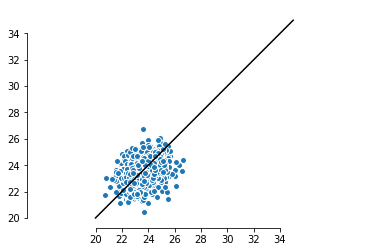

In [43]:
plt.scatter(mean_curvatures["POR"], mean_curvatures['P'], edgecolors='white')
plt.plot([20, 35], [20, 35], 'k')
plt.axis('equal')
sns.despine(trim=True)

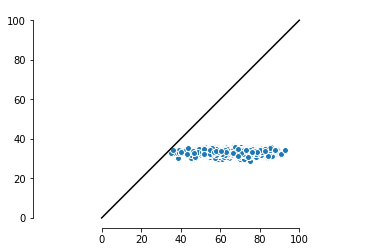

In [54]:
plt.scatter(pixel_curv, mean_curvatures['V1'], edgecolors='white')
plt.plot([0, 100], [0, 100], 'k')
plt.axis('equal')
sns.despine(trim=True)

In [41]:
sum(mean_curvatures['LI'] > mean_curvatures["POR"])

1344

In [55]:
CurvatureResponse()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),trial_idx trial index within sessions,brain_area short name for cortical area,method_id method identifier,curvature curvature trajectory of responses,avg_curvature average curvature
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,AL,0,=BLOB=,24.27107934835715
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LI,0,=BLOB=,25.23362482484032
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LLA,0,=BLOB=,26.309605546511694
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,LM,0,=BLOB=,30.20909
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,P,0,=BLOB=,22.712978859207112
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,POR,0,=BLOB=,23.495142610805313
16314,4,3,3,+6i/cZnyru6LU7/D/RCB,3324,RL,0,=BLOB=,26.851355392968387


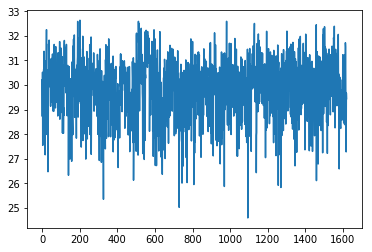

In [58]:
plt.plot(mean_curvatures['LM'])